# Confidence intervals

## Introduction

The Air Quality Index (AQI) is the Environmental Protection Agency's index for reporting air quality. A value close to 0 signals little to no public health concern, while higher values are associated with increased risk to public health. The United States is considering a new federal policy that would create a subsidy for renewable energy in states observing an average AQI of 10 or above.<br>

You've just started your new role as a data analyst in the Strategy division of Ripple Renewable Energy (RRE). **RRE operates in the following U.S. states: `California`, `Florida`, `Michigan`, `Ohio`, `Pennsylvania`, `Texas`.** You've been tasked with constructing an analysis which identifies which of these states are most likely to be affected, should the new federal policy be enacted.

Your manager has requested that you do the following for your analysis:
1. Provide a summary of the mean AQI for the states in which RRE operates.
2. Construct a boxplot visualization for AQI of these states using `seaborn`.
3. Evaluate which state(s) may be most affected by this policy, based on the data and your boxplot visualization.
4. Construct a confidence interval for the RRE state with the highest mean AQI.

## Step 1: Imports

### Import packages

Import `pandas` and `numpy`.

In [1]:
import pandas as pd
import numpy as np

### Load the dataset

The dataset provided gives national Air Quality Index (AQI) measurements by state over time. Use `pandas` to import the file `c4_epa_air_quality.csv` as a DataFrame named `aqi`.

*Note: For the purposes of your analysis, you can assume this data is randomly sampled from a larger population.*

In [2]:
aqi = pd.read_csv('datasets/c4_epa_air_quality.csv')

## Step 2: Data exploration

### Explore your dataset

Before proceeding to your deliverables, spend some time exploring the `aqi` DataFrame. 

In [3]:

print("Use describe() to summarize AQI")
print(aqi.describe(include='all'))

print("For a more thorough examination of observations by state use values_counts()")
print(aqi['state_name'].value_counts())

Use describe() to summarize AQI
        Unnamed: 0  date_local  state_name  county_name      city_name  \
count   260.000000         260         260          260            260   
unique         NaN           1          52          149            190   
top            NaN  2018-01-01  California  Los Angeles  Not in a city   
freq           NaN         260          66           14             21   
mean    129.500000         NaN         NaN          NaN            NaN   
std      75.199734         NaN         NaN          NaN            NaN   
min       0.000000         NaN         NaN          NaN            NaN   
25%      64.750000         NaN         NaN          NaN            NaN   
50%     129.500000         NaN         NaN          NaN            NaN   
75%     194.250000         NaN         NaN          NaN            NaN   
max     259.000000         NaN         NaN          NaN            NaN   

       local_site_name   parameter_name   units_of_measure  arithmetic_mean  \


**Question:** What time range does this data cover?

All of the sites collected data on January 1st, 2018.

**Question:** What are the minimum and maximum AQI values observed in the dataset?

The minimum AQI value is 0 and the maximum AQI value is 50.

**Question:** Are all states equally represented in the dataset?

No, all states are not equally represented. California has 66 sites that reported AQI for this dataset, while states such as Delaware and Alabama have only one site that reported AQI. 

## Step 3: Statistical tests

### Summarize the mean AQI for RRE states

Start with your first deliverable. Summarize the mean AQI for the states in which RRE operates.

In [4]:
# Create a list of RRE states.

rre_states = ['California','Florida','Michigan','Ohio','Pennsylvania','Texas']

# Subset `aqi` to only consider these states.

aqi_rre = aqi[aqi['state_name'].isin(rre_states)]

# Find the mean aqi for each of the RRE states.

aqi_rre.groupby(['state_name']).agg({"aqi":"mean","state_name":"count"}) #alias as aqi_rre

,aqi,state_name
state_name,,
California,12.121212,66
Florida,5.500000,12
Michigan,8.111111,9
Ohio,3.333333,12
Pennsylvania,2.900000,10
Texas,2.700000,10


### Construct a boxplot visualization for the AQI of these states

Seaborn is a simple visualization library, commonly imported as `sns`. Import `seaborn`. Then utilize a boxplot visualization from this library to compare the distributions of AQI scores by state.

In [6]:
import seaborn as sns

### Create an in-line visualization showing the distribution of `aqi` by `state_name`

Now, create an in-line visualization showing the distribution of `aqi` by `state_name`.

<Axes: xlabel='state_name', ylabel='aqi'>

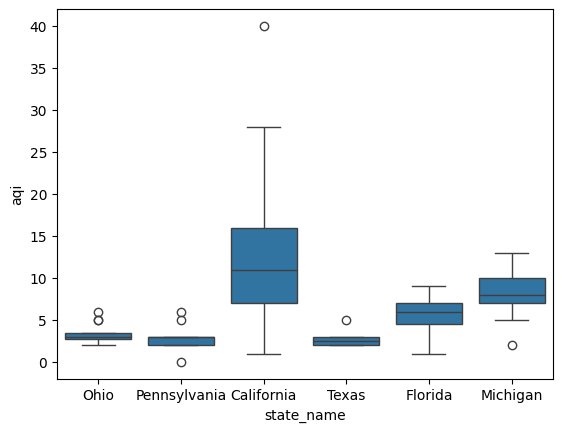

In [7]:
sns.boxplot(x=aqi_rre["state_name"],y=aqi_rre["aqi"])

**Question:** Based on the data and your visualizations, which state(s) do you suspect will be most affected by this policy?

- California: The mean and a signficant portion of the boxplot range over 10.
- Michigan: While the mean is below 10, the boxplot ranges above 10.

### Construct a confidence interval for the RRE state with the highest mean AQI

Recall the four-step process for constructing a confidence interval:

1.   Identify a sample statistic.
2.   Choose a confidence level.
3.   Find the margin of error. 
4.   Calculate the interval.

### Construct your sample statistic

To contruct your sample statistic, find the mean AQI for your state.

In [11]:
aqi_ca = aqi[aqi['state_name']=='California']

sample_mean = aqi_ca['aqi'].mean()
print(sample_mean)

12.121212121212121


### Choose your confidence level

Choose your confidence level for your analysis. The most typical confidence level chosen is 95%; however, you can choose 90% or 99% if you want decrease or increase (respectively) your level of confidence about your result.

In [18]:
confidence_level = 0.95
confidence_level

0.95

### Find your margin of error (ME)

Recall **margin of error = z * standard error**, where z is the appropriate z-value for the given confidence level. To calculate your margin of error:

- Find your z-value. 
- Find the approximate z for common confidence levels.
- Calculate your **standard error** estimate. 

| Confidence Level | Z Score |
| --- | --- |
| 90% | 1.65 |
| 95% | 1.96 |
| 99% | 2.58 |


In [13]:
# Begin by identifying the z associated with your chosen confidence level.

z_value = 1.96

# Next, calculate your standard error.

standard_error = aqi_ca['aqi'].std() / np.sqrt(aqi_ca.shape[0])
print("standard error:")
print(standard_error)

# Lastly, use the preceding result to calculate your margin of error.

margin_of_error = standard_error * z_value
print("margin of error:")
print(margin_of_error)

standard error:
0.8987209641127412
margin of error:
1.7614930896609726


### Calculate your interval

Calculate both a lower and upper limit surrounding your sample mean to create your interval.

In [15]:
upper_ci_limit = sample_mean + margin_of_error
lower_ci_limit = sample_mean - margin_of_error
print(lower_ci_limit, upper_ci_limit)

10.359719031551148 13.882705210873095


### Alternative: Construct the interval using `scipy.stats.norm.interval()`

`scipy` presents a simpler solution to developing a confidence interval. To use this, first import the `stats` module from `scipy`.

In [16]:
from scipy import stats

## Step 4: Results and evaluation

### Recalculate your confidence interval

Provide your chosen `confidence_level`, `sample_mean`, and `standard_error` to `stats.norm.interval()` and recalculate your confidence interval.

In [22]:
stats.norm.interval(confidence_level, loc=sample_mean, scale=standard_error)

(np.float64(10.359751399400034), np.float64(13.882672843024208))

# Considerations

**What are key takeaways from this lab?**

* Based on the mean AQI for RRE states, California and Michigan were most likely to have experienced a mean AQI above 10.
* With California experiencing the highest sample mean AQI in the data, it appears to be the state most likely to be affected by the policy change. 
* Constructing a confidence interval allowed you to estimate the sample mean AQI with a certain degree of confidence.

**What findings would you share with others?**

* Present this notebook to convey the analytical process and describe the methodology behind constructing the confidence interval. 
* Convey that a confidence interval at the 95% level of confidence from this sample data yielded `[10.36 , 13.88]`, which provides the interpretation "given the observed sample AQI measurements, there is a 95% confidence that the population mean AQI for California was between 10.36 and 13.88. This range is notably greater than 10."
* Share how varying the confidence level changes the interval. For example, if you varied the confidence level to 99%, the confidence interval would become `[9.80 , 14.43]`. 


**What would you convey to external stakeholders?**

* Explain statistical significance at a high level. 
* Describe California's observed mean AQI and suggest focusing on that state.
* Share the result of the 95% confidence interval, describing what this means relative to the threshold of 10.
* Convey any potential shortcomings of this analysis, such as the short time period being referenced. 

**References**

[seaborn.boxplot — seaborn 0.12.1 documentation](https://seaborn.pydata.org/generated/seaborn.boxplot.html). (n.d.). 